# Detección de Fraude

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos los datos
df = pd.read_csv('./../fraude_tc.csv')

# Análisis Exploratorio

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# información general sobre el dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Comprobamos si existen registros duplicados
df[df.duplicated()==True]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [18]:
# convertimos la columna fraud a enteros para tener 0 para no fraude y 1 para fraude 
df['fraud'] = df['fraud'].astype(int)

Veamos la proporción de los casos de estafa respecto al total de los eventos

In [19]:
# Visualizamos la distribución de los precios
df['fraud'].value_counts()*100 / len(df['fraud'])

0    91.2597
1     8.7403
Name: fraud, dtype: float64

In [20]:
df['fraud'].unique()

array([0, 1])

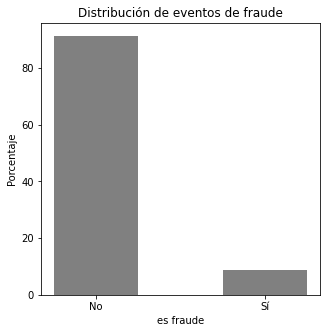

In [44]:
## Declaramos valores para el eje x

eje_x = df['fraud'].unique()
 
## Declaramos valores para el eje y
eje_y = 100 * df['fraud'].value_counts() / len(df['fraud'])

## Creamos Gráfica
plt.figure(figsize=(5,5))
plt.bar(eje_x, eje_y, width=0.5, color='gray', tick_label = ['No','Sí'])

## Legenda en el eje y
plt.ylabel('Porcentaje')
 
## Legenda en el eje x
plt.xlabel('es fraude')
 
## Título de Gráfica
plt.title('Distribución de eventos de fraude')
 
## Mostramos Gráfica
plt.show()

Correlación

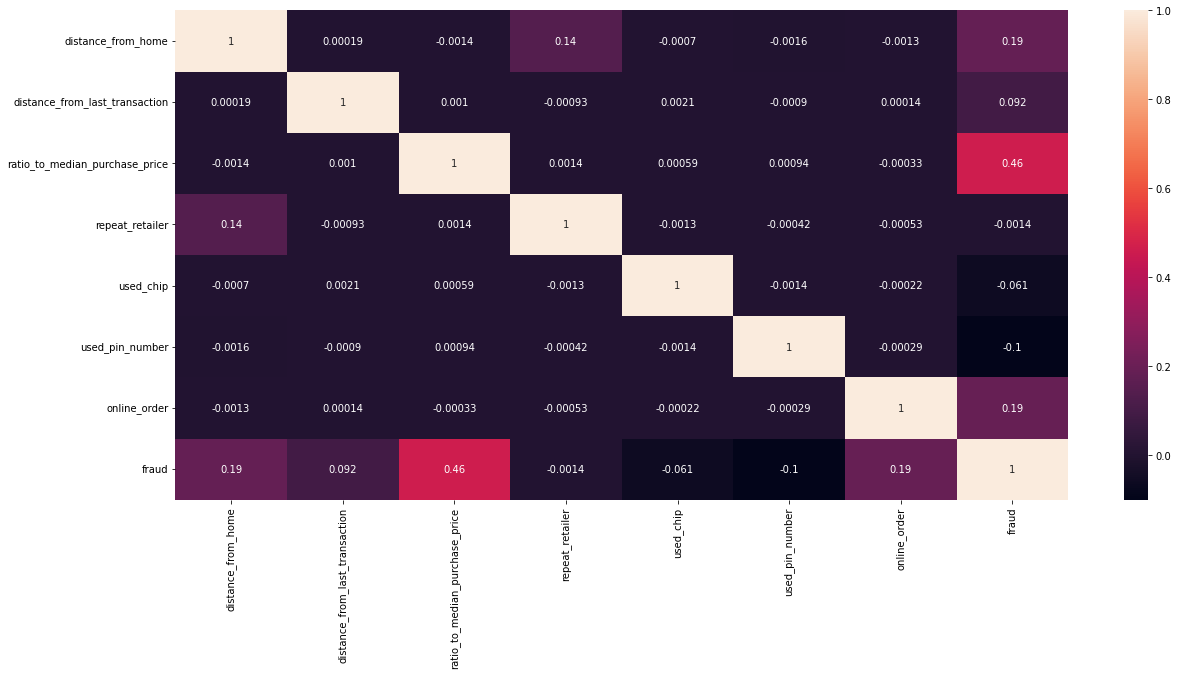

In [45]:
# Visualizamos la correlación de las características
corrmat = df.corr()
plt.figure(figsize=(20, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Separación de la columna fraud y las características de los eventos
No queremos aplicar ninguna transformación a los precios ('SalePrice'). Para evitarlo, simplemente creamos una serie separada con los precios y eliminamos esa columna del conjunto de datos de las características.


In [46]:
caracteristicas = df.drop('fraud',axis =1)
fraude = df['fraud'].copy()

# Division del conjunto de datos

Separamos nuestro conjunto de datos final en un conjunto de entrenamiento y un conjunto de prueba

In [47]:
# División del conjunto de datos
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(caracteristicas,fraude,test_size = 0.3,random_state= 0)

# Feature Engenering
Todos los datos son numéricos, así que no hay necesidad de seprarar por numéricos y categóricos

No hay datos faltantes :)

Vamos a crear una lista con los nombres de aquellas caracteristicas que tengan una correlacion con valor absoluto igual o mayor que 0.05

In [49]:
# caracteristicas mas correlacionadas
top_corr_features = corrmat.index[abs(corrmat["fraud"])>=0.05]

In [50]:
top_corr_features

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'used_chip', 'used_pin_number',
       'online_order', 'fraud'],
      dtype='object')

In [51]:
len(top_corr_features)

7

In [52]:
# Vamos a tomar solo esas caracteristicas para el resto del proceso
top_corr_features = top_corr_features.drop('fraud')
final = caracteristicas[top_corr_features]
final

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,0.0,1.0
...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,0.0,0.0,1.0


### Creación de un transformador personalizado para FeatEng
Necesitamos garantizar que estamos aplicando exactamente la misma transformación a los datos nuevos/no vistos. Para ello vamos a crear transformadores personalizados utilizando scikit-learn BaseEstimator.

Este primer transformador personalizado hará la ingeniería de características que acabamos de describir anteriormente.

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()

        # caracteristicas mas correlacionadas
        df = df[top_corr_features]

        return df

In [54]:
## Creación de pipelines para manejar datos no vistos
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_a = Pipeline([  ('attribs_adder', AttributesAdder()),
                         ('std_scaller', StandardScaler())
                        ])

In [57]:
train_prepared = pipeline_a.fit_transform(X_train)

# veamos cómo son los datos resultantes
train_prepared

array([[ 4.38273387e-01,  8.82209133e-02, -8.59629105e-02,
        -7.34375457e-01, -3.34868255e-01,  7.32164328e-01],
       [ 4.89278638e-01, -1.54601108e-01, -2.26320816e-01,
         1.36170128e+00, -3.34868255e-01,  7.32164328e-01],
       [-3.93768762e-01, -1.51032157e-01, -5.54933696e-01,
         1.36170128e+00, -3.34868255e-01,  7.32164328e-01],
       ...,
       [ 2.16112372e-03, -2.35114724e-02, -4.77736834e-01,
        -7.34375457e-01,  2.98624902e+00, -1.36581361e+00],
       [-2.22525517e-01, -1.82379201e-01, -1.09889289e-02,
        -7.34375457e-01, -3.34868255e-01,  7.32164328e-01],
       [ 3.47409343e-01, -1.64748734e-01,  4.98862140e-01,
         1.36170128e+00, -3.34868255e-01, -1.36581361e+00]])

In [58]:
# Preaparamos ahora los datos  del conjunto de prueba
test_prepared = pipeline_a.transform(X_test)
test_prepared

array([[-0.35252726, -0.17989983,  0.88472894, -0.73437546, -0.33486826,
         0.73216433],
       [-0.39646753, -0.12735438, -0.38842115, -0.73437546, -0.33486826,
         0.73216433],
       [-0.38645348, -0.1453081 , -0.42890454, -0.73437546, -0.33486826,
         0.73216433],
       ...,
       [-0.32560452, -0.17022815, -0.42842117, -0.73437546, -0.33486826,
         0.73216433],
       [-0.35740409, -0.14586446, -0.40322051,  1.36170128,  2.98624902,
         0.73216433],
       [-0.11436316,  0.2087603 ,  0.87286835, -0.73437546, -0.33486826,
         0.73216433]])

In [59]:
# Regresión lineal
#Probamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, y_train)

LinearRegression()

In [60]:
#Veamos algunas predicciones y evaluamos el modelo
y_predd = lin_reg.predict(test_prepared)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
157105,1,0.241802
374554,0,0.074485
688694,0,0.069290
265381,0,-0.090669
955415,1,0.218957
4280,0,-0.171731
514674,0,0.055290
800352,0,-0.093294
94727,1,0.308420
753889,0,0.108110


In [61]:
## Random forest
from sklearn.ensemble import RandomForestRegressor

#Esto tarda un poco

forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, y_train)
y_predd = forest_reg.predict(test_prepared)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
157105,1,1.0
374554,0,0.0
688694,0,0.0
265381,0,0.0
955415,1,1.0
4280,0,0.0
514674,0,0.0
800352,0,0.0
94727,1,1.0
753889,0,0.0


In [70]:
y_predd.astype(int)

array([1, 0, 0, ..., 0, 0, 1])

In [73]:
len(y_predd.astype(int))

300000

In [64]:
df[20000:20020]

,Actual,Predicted
117101,0,0.0
758421,0,0.0
794672,0,0.0
695355,0,0.0
776906,0,0.0
350557,0,0.0
84041,0,0.0
918910,1,1.0
301150,0,0.0
595902,1,1.0


## Métrica a utilizar

Se utilizará para evaluar el desempeño del/los modelo/s la precisión (acurracy) de la matriz de confusión (confusion matrix).

$$ Accuracy=\frac{TP+TN}{P+N}$$

siendo $TP$ los verdaderos positivos, $TN$ verdaderos negativos y $P+N$ población total.

In [71]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predd.astype(int))

array([[273907,      0],
       [    19,  26074]], dtype=int64)

In [72]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predd.astype(int))

0.9999366666666667

Cargaremos los datos nuevos para predecir los precios y generar un dataframe con dichas predicciones

In [ ]:

houses_test = pd.read_csv('./../houses_test_raw.csv')
houses_test
# Preaparamos los datos
houses_prepared = pipeline_a.transform(houses_test)
houses_prepared
# Generamos las predicciones
h_predd = forest_reg.predict(houses_prepared)
houses_predd = pd.DataFrame({'Prediccion Precios': h_predd})
houses_predd
houses_predd.to_csv('./../prediccion.csv', index=False)
